In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score




## Read Dataset

In [52]:
df = pd.read_csv('./clean_divar_data.csv')

In [53]:
df.head()

,cat2_slug,cat3_slug,city_slug,neighborhood_slug,user_type,rent_mode,rent_value,rent_to_single,rent_type,price_mode,...,transformable_credit_log,transformed_credit_log,land_size_transformed,building_size_transformed,total_floors_count_transformed,regular_person_capacity_transformed,extra_person_capacity_transformed,room_size_avg_transformed,price_value_per_sqm_transformed,transformable_rent_per_sqm_transformed
0,5,14,181,669,0,2,5000000.0,1.0,1,2,...,19.336971,22.133438,0.040241,1.463128,-0.053080,-0.010866,4.777969,1.762084,-1.088448,-0.744117
1,4,1,396,363,0,2,5000000.0,1.0,1,0,...,19.336971,20.163925,0.040241,-0.766585,-0.053080,-0.010866,0.006866,-0.290883,1.757336,0.503617
2,3,0,396,1121,1,0,26000000.0,1.0,1,2,...,20.435583,21.008987,0.040241,0.226285,-0.053080,-0.010866,0.006866,-0.103568,-0.199221,1.248849
3,0,6,396,274,1,0,95000000.0,1.0,1,2,...,20.671972,20.885544,0.040241,-0.228136,-0.053080,-0.010866,0.006866,0.448792,0.120611,3.246893
4,4,1,251,283,0,2,5000000.0,1.0,1,0,...,19.336971,20.122866,0.040241,0.068456,1.661991,-0.010866,0.006866,0.173798,0.554809,0.049618


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 79 columns):
 #   Column                                  Non-Null Count    Dtype  
---  ------                                  --------------    -----  
 0   cat2_slug                               1000000 non-null  int64  
 1   cat3_slug                               1000000 non-null  int64  
 2   city_slug                               1000000 non-null  int64  
 3   neighborhood_slug                       1000000 non-null  int64  
 4   user_type                               1000000 non-null  int64  
 5   rent_mode                               1000000 non-null  int64  
 6   rent_value                              1000000 non-null  float64
 7   rent_to_single                          1000000 non-null  float64
 8   rent_type                               1000000 non-null  int64  
 9   price_mode                              1000000 non-null  int64  
 10  price_value                    

In [ ]:
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

## Scaling And D-Reduction

In [56]:
df.drop(['shamsi_date' , 'age_category','shamsi_date','market_segment'] , axis = 1 , inplace=True)

In [57]:
numeric_cols = df.select_dtypes(include=['int64', 'float64', 'int8']).columns.tolist()


## Kmeans

In [58]:
imputer = SimpleImputer(strategy="mean") 
X = imputer.fit_transform(df)  


In [59]:
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

### Finding the best k based on Elbow

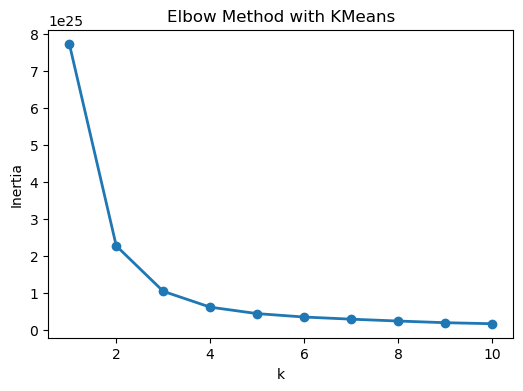

In [60]:
plt.figure(figsize=(6,4))
plt.plot(K_range, inertias, 'o-', linewidth=2)
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method with KMeans")
plt.show()

##### k = 3

In [61]:
best_k = 3
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
y_pred = final_kmeans.fit_predict(X)

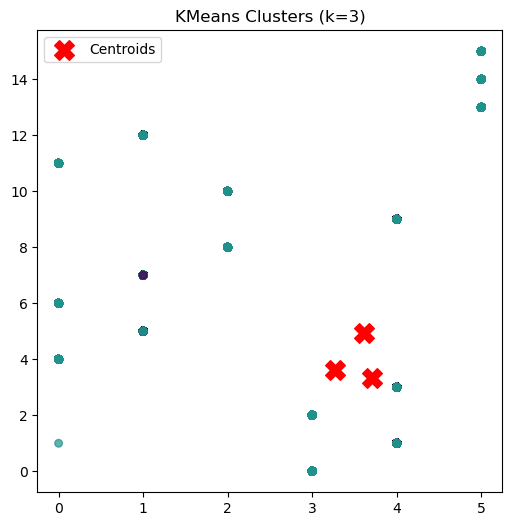

In [62]:



plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap="viridis", s=30, alpha=0.7)
plt.scatter(final_kmeans.cluster_centers_[:,0],
        final_kmeans.cluster_centers_[:,1],
        c="red", marker="X", s=200, label="Centroids")
plt.title(f"KMeans Clusters (k={best_k})")
plt.legend()
plt.show()


In [38]:
'''
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(final_kmeans.cluster_centers_)


plt.figure(figsize=(7,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred, cmap="viridis", s=30, alpha=0.7)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], 
            c="red", marker="X", s=200, label="Centroids")
plt.title(f"KMeans Clusters (k={best_k}) in PCA space")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()
'''

'\npca = PCA(n_components=2, random_state=42)\nX_pca = pca.fit_transform(X)\ncentroids_pca = pca.transform(final_kmeans.cluster_centers_)\n\n\nplt.figure(figsize=(7,6))\nplt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred, cmap="viridis", s=30, alpha=0.7)\nplt.scatter(centroids_pca[:,0], centroids_pca[:,1], \n            c="red", marker="X", s=200, label="Centroids")\nplt.title(f"KMeans Clusters (k={best_k}) in PCA space")\nplt.xlabel("PCA 1")\nplt.ylabel("PCA 2")\nplt.legend()\nplt.show()\n'

In [63]:
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(final_kmeans.cluster_centers_)



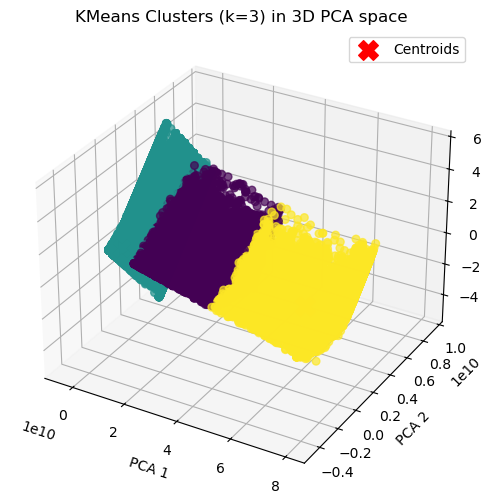

In [64]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], 
           c=y_pred, cmap="viridis", s=30, alpha=0.7)
ax.scatter(centroids_pca[:,0], centroids_pca[:,1], centroids_pca[:,2],
           c="red", marker="X", s=200, label="Centroids")

ax.set_title(f"KMeans Clusters (k={best_k}) in 3D PCA space")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.legend()
plt.show()


In [50]:

sil_scores = []
K_range = range(2, 11)  # silhouette score needs at least 2 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    sil_scores.append(score)




KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(K_range, sil_scores, 'o-', linewidth=2, color="purple")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal k")
plt.show()
